In [ ]:
import torch as t
from torch import nn #nn contains all building blocks of pytorch for building nueral netwroks
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
t.__version__

'2.3.1+cu121'

In [ ]:
#create a parameter linear regression formula y = a + bX (where a = bias/intercept & b = weight/slope)
weight = 0.7
bias = 0.3
start = 0
end = 1
hops = 0.02
X = t.arange(start,end,hops).unsqueeze(dim=1)
y = bias + weight * X
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X) , len(y)

(50, 50)

Splitting data into training and test sets

In [ ]:
#create a train and test split
Train_split = int(0.8 * len(X))
X_train , y_train = X[:Train_split],y[:Train_split]
X_test , y_test = X[Train_split:],y[Train_split:]
len(X_train) , len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
#visualize our data
def plot_prediction(train_data = X_train , train_label= y_train , test_data = X_test, test_label = y_test , prediction = None ):
  """ Plot Train and test data """
  plt.scatter(train_data , train_label , c = "b" , s = 4, label = "Training data")

  #plot test data
  plt.scatter(test_data , test_label , c = "g" , s = 4 , label = "Test data")

  #plot if prediction exists
  if prediction is not None:
    plt.scatter(test_data , prediction , c = "r" , s = 4 , label = "Predictions" )
  plt.legend(prop={"size" : 14})

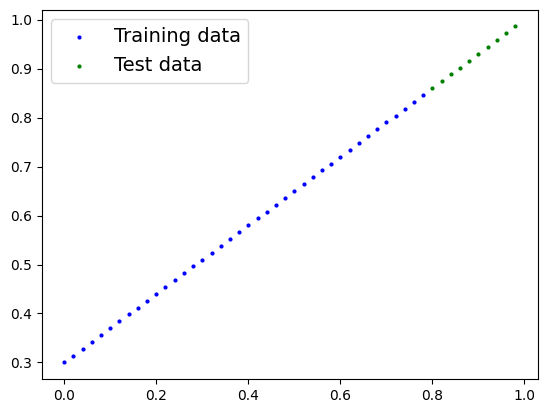

In [ ]:
plot_prediction()

what does our model do?
It first starts with random values.
Then look at our training data and adjust our random values to better represent the ideal values that we used to create the data.

It will be done with help of two main algorithm gradient descent and backpropogation.


The base class of our neural network module is nn.Module, if its our subclass then we need to override the forward method.


torch.optim = this where the optimizers in Pytorch live , they will help with gradient descent algorithm.

In [ ]:
#Everything in pytorch is being inherited through nn module
class linearregressionmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(t.randn(1 , requires_grad= True , dtype = t.float))

    self.bias = nn.Parameter(t.randn(1,requires_grad= True , dtype = t.float))

    #Forward method to perform computation
  def forward(self , x  : t.Tensor) -> t.Tensor: # x is the input
    return self.weight * x + self.bias


In [ ]:
t.manual_seed(42)
model_0 = linearregressionmodel()

#check the list of parameters in our model

list (model_0.parameters()) , model_0.state_dict() #state_dict() help us retreive name for the tensor.

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

Making prediction using "torch.inference_mode()" this will help to check our model's predictive power.

In [ ]:
with t.inference_mode():
  y_prediction = model_0(X_test)
y_prediction

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

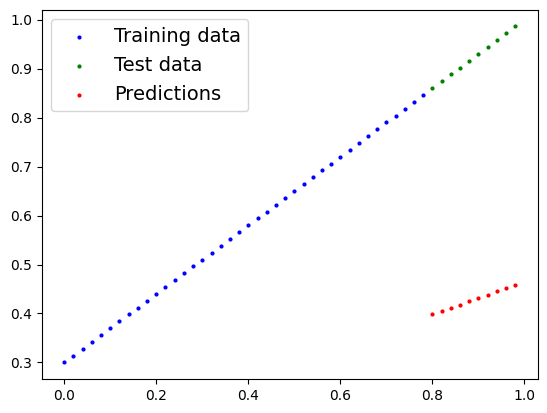

In [ ]:
plot_prediction(prediction = y_prediction)

Train model.
This help us to improve our model to generate earlier random parameters to known parameter values.

One way of improving is with the use of loss function.


Loss Function
The loss function measures how wrong a model's prediction is for a single data point. It's like checking a single quiz answer to see if it's right or wrong.

Cost Function
The cost function takes the average of these errors from all data points to see how well the model performs overall. It's like calculating the overall score of a test based on all the individual answers.

So, the loss function is about individual errors, while the cost function looks at the average error across all examples.

Optimizers : optimizers take this loss function into account and try to adjust our parameters.

In [ ]:
#setup loss function
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = t.optim.SGD(params= model_0.parameters() , lr = 0.01) # lr is the learning rate and most important hyperparameter to be set.

In [ ]:
t.manual_seed(42)
epochs = 200 #epoch is one loop through  data

#Track Different Models
epoch_count = []
loss_count = []
test_losscount = []

for epoch in range(epochs):
  model_0.train() #train mode in Pytorch sets all the parameter that requires gradients to required gradients

  #Forward pass
  y_predict = model_0(X_train)

  #Setup loss function

  loss = loss_fn(y_predict , y_train)

  #setup optimizer to zero grad

  optimizer.zero_grad()

  #backward propogation

  loss.backward()

  #step the optimizer

  optimizer.step()


  #Testing
  model_0.eval() #turns off the different settings in the model not need for evaluation/testing
  with t.inference_mode(): #turns off gradient tracking

  #Do Forwards pass
    test_pred = model_0(X_test)

  #loss fundtion
    test_loss = loss_fn(X_test , y_test)

    if epoch % 20 == 0:
      epoch_count.append(epoch)
      loss_count.append(loss)
      test_losscount.append(test_loss)
      print(f"Epoch : {epoch} | Loss : {loss} | Test_loss : {test_loss}" )


print(model_0.state_dict())

Epoch : 0 | Loss : 0.31288138031959534 | Test_loss : 0.032999999821186066
Epoch : 20 | Loss : 0.08908725529909134 | Test_loss : 0.032999999821186066
Epoch : 40 | Loss : 0.04543796554207802 | Test_loss : 0.032999999821186066
Epoch : 60 | Loss : 0.03818932920694351 | Test_loss : 0.032999999821186066
Epoch : 80 | Loss : 0.03132382780313492 | Test_loss : 0.032999999821186066
Epoch : 100 | Loss : 0.024458957836031914 | Test_loss : 0.032999999821186066
Epoch : 120 | Loss : 0.01758546568453312 | Test_loss : 0.032999999821186066
Epoch : 140 | Loss : 0.010716589167714119 | Test_loss : 0.032999999821186066
Epoch : 160 | Loss : 0.0038517764769494534 | Test_loss : 0.032999999821186066
Epoch : 180 | Loss : 0.008932482451200485 | Test_loss : 0.032999999821186066
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])


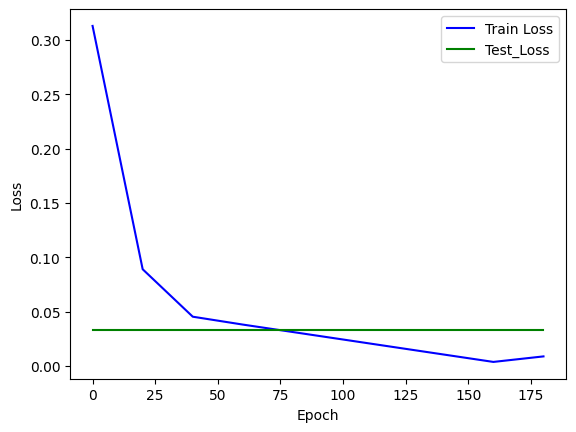

In [ ]:
plt.plot(epoch_count , np.array(t.tensor(loss_count).cpu().numpy()), label = "Train Loss" , c = "b")
plt.plot(epoch_count , test_losscount, label = "Test_Loss" , c = "g")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

In [ ]:
with t.inference_mode():
  y_pre = model_0(X_test)
y_pre

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

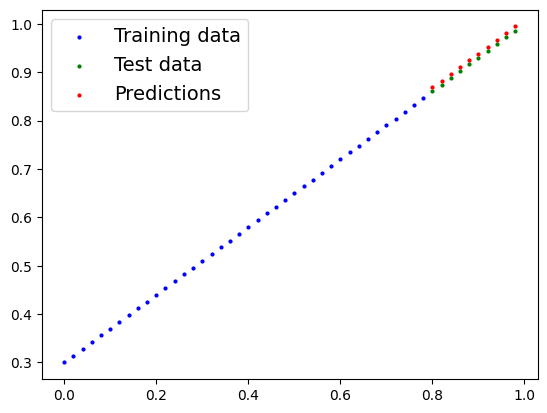

In [ ]:
plot_prediction(prediction= y_pre)

Three main steps to save and load models in pytorch

1. 'torch.save' : allows you to save pytorch object
2. 'torch.load' : allows you to load saved pytorch object
3. 'torch.nn.Module.load_state_dict()' : this allows to load saved model state dictionary.

In [ ]:
from pathlib import Path

#Create a model Path/directory
Model_path = Path("model")
Model_path.mkdir(parents=True ,exist_ok=True)

#create model name and save path
Model_name = "01_WorkFlow.pth"
Model_save_path = Model_path / Model_name

t.save(obj = model_0.state_dict() , f = Model_save_path)

In [ ]:
module_1 = linearregressionmodel()
module_1.load_state_dict(t.load(f=Model_save_path))

<All keys matched successfully>

In [ ]:
module_1.eval()
with t.inference_mode():
  load_prediction = module_1(X_test)
load_prediction

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
load_prediction == y_pre

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])